In [1]:
# tryng my own model with numpy 
# might try keras later
import numpy as np
import pandas as pd
from math import e, inf, sqrt
import random
from PIL import Image
import matplotlib.pyplot as plt

# activation 
def sig(x):
    y = 1/(1 + np.exp(-x))
    return y

# activation gradient
def sigDeriv(x):
    y = sig(x)*(1-sig(x))
    return y
x = np.array([1,2,3])
sigDeriv(x)



array([0.19661193, 0.10499359, 0.04517666])

In [2]:
dat = pd.read_csv("handwritten digits (images).csv",dtype=int)
numOfDatasets = len(dat)
dat

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
TrainingData = pd.DataFrame(dat.iloc[:, 1:]).to_numpy(copy=True, dtype=np.int32)

# normalise data (make mean 0 and std 1)
mean = np.mean(TrainingData)
std = np.std(TrainingData)
TrainingData = (TrainingData - mean)/std
sum(TrainingData[0,:])

-121.28699186719702

correct ans: 1


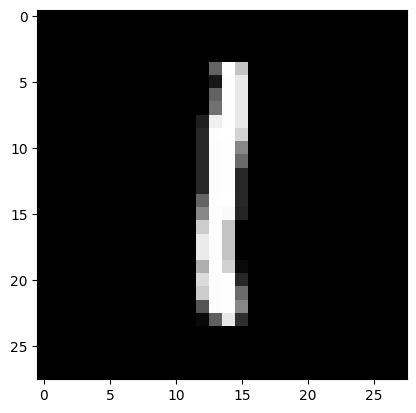

In [4]:
# used to test later 
def DataColToImage(x):
    image = Image.fromarray(TrainingData[x, :].reshape(28,28) * std + mean)
    plt.imshow(image)
    print("correct ans:", dat.iloc[x, 0])
DataColToImage(random.randint(0,42000))

In [5]:
TrainingData[1, :].shape

(784,)

In [6]:
# separate training and test data by indexes 
testNum = 6000
allIndex = list(range(0,42000))
trainIndex = []
for i in range(0, 42000 - testNum):
    x = random.randint(0, len(allIndex) - 1)
    trainIndex.append(allIndex[x])
    allIndex.pop(x)
testIndex = allIndex
print(len(testIndex))

6000


In [7]:
x = np.array([[1,2,3],
              [1,2,3]])

y = np.array([[1,2,3]])

y.shape

(1, 3)

In [8]:
inputNumber = 784
Hidden1NeuronCount = 110
Hidden2NeuronCount = 110 
outputCount = 10
learningRate = 0.1

# all weights from each row will lead to same neuron of the next layer 
# all weights from same column will act on same neuron of current layer
# first row weights are all weights that lead to first neuron in the next layer, etc
# first column weights are all weights that act on first neuron of current layer 
# weight.T = [all weights that act on first neuron of current layer]
#          [all weights that act on second neuron of current layer], etc...
# weight = [all weights that lead to first neuron of next layer]
#            [all weights that lead to second neuron of next layer], etc... 
# data will be a single column
# next layer calculated will be single column with all neurons (good)
# h,g,f,H,G,F == inactivated and activated hidden layers and final layers respectively

weights1 = np.random.uniform(-0.5,0.5,(Hidden1NeuronCount, inputNumber))
weights2 = np.random.uniform(-0.5,0.5,(Hidden2NeuronCount, Hidden1NeuronCount))
weights3 = np.random.uniform(-0.5,0.5,(outputCount, Hidden2NeuronCount))

biases1 = np.random.uniform(-0.1,0.1,(Hidden1NeuronCount, 1))
biases2 = np.random.uniform(-0.2,0.2,(Hidden2NeuronCount, 1))
biases3 = np.random.uniform(-0.3,0.3,(outputCount,1))

print(weights1.shape, weights2.shape, weights3.shape)
sig(weights1)

(110, 784) (110, 110) (10, 110)


array([[0.3962206 , 0.43835689, 0.41969374, ..., 0.45444818, 0.575145  ,
        0.58230944],
       [0.46000627, 0.505736  , 0.40520706, ..., 0.38756771, 0.38637834,
        0.52813933],
       [0.38554748, 0.40853978, 0.6063086 , ..., 0.52328701, 0.53907396,
        0.4569696 ],
       ...,
       [0.42590739, 0.49430611, 0.39639037, ..., 0.46602982, 0.47466274,
        0.54299756],
       [0.58252181, 0.57452152, 0.59504886, ..., 0.47147191, 0.44651449,
        0.5119129 ],
       [0.49136471, 0.56407504, 0.62135312, ..., 0.38661846, 0.52980602,
        0.4130153 ]])

In [19]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def test():
    # single test
    randomTest = testIndex[random.randint(0, testNum-1)] # only uses testdata for testing dont use data that will be iused in raining 
    prams = forwardProp(randomTest, weights1, weights2, weights3, biases1, biases2, biases3)
    modelAns, hidden1, hidden2, finallayer, UnactivatedHidden1, UnativatedHidden2, UnactivatedFinalLayer, data = prams
    ans = finallayer
    cost = np.sum((modelAns - finallayer)**2)
    DataColToImage(randomTest)
    print("predicted:", ans.argmax())
    return ans

def testMany():
    # test a bunch for accuracy calculations 
    correct = 0
    wrong = 0
    for i in range(0, testNum):
        singleTest = testIndex[i] # only uses testdata for testing dont use data that will be iused in raining
        finallayer = forwardProp(singleTest, weights1, weights2, weights3, biases1, biases2, biases3)[3]
        ans = softmax(finallayer)
        pred = ans.argmax()
        corr = int(dat.iloc[singleTest, 0])
        if pred == corr:
            correct += 1
        else:
            wrong += 1
    print("accuracy:", str((correct/(correct + wrong))*100) + "%" , flush=False)



In [10]:
def forwardProp(x, weight1, weight2, weight3, bias1, bias2, bias3):
    # forward propagation 
    data = TrainingData[x,:].reshape(inputNumber,1)
    
    UnactivatedHidden1 = np.dot(weight1, data)
    hidden1 = sig(UnactivatedHidden1) + bias1

    UnativatedHidden2 = np.dot(weight2, hidden1)
    hidden2 = sig(UnativatedHidden2) + bias2

    UnactivatedFinalLayer = np.dot(weight3, hidden2)
    finalLayer = sig(UnactivatedFinalLayer) + bias3

    correctAns = dat.iloc[x,0]
    modelAns = np.zeros((1,outputCount)) # create empty array
    modelAns[0,correctAns] = 1 # make the correct index become 1 rest remain 0
    return [modelAns, hidden1, hidden2, finalLayer, UnactivatedHidden1, UnativatedHidden2, UnactivatedFinalLayer, data]

forwardProp(41999, weights1, weights2, weights3, biases1, biases2, biases3) #[3].shape

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([[-0.04490952],
        [ 0.98382835],
        [ 1.04292736],
        [ 0.98932649],
        [ 0.52375103],
        [-0.04596471],
        [-0.03110515],
        [-0.02611931],
        [ 0.96327816],
        [ 0.03975782],
        [ 1.05914842],
        [ 0.96472296],
        [ 0.89971689],
        [-0.07191816],
        [ 0.40854387],
        [ 0.5825439 ],
        [ 0.06650123],
        [ 0.33478662],
        [ 0.03187021],
        [ 0.89144537],
        [ 0.21658867],
        [ 0.30221024],
        [ 1.04471258],
        [ 0.95500551],
        [ 1.03035312],
        [ 0.8158247 ],
        [ 1.09359096],
        [ 0.26641236],
        [ 1.08360496],
        [ 0.65496177],
        [ 0.92191401],
        [ 0.04136458],
        [ 0.9425752 ],
        [-0.02252082],
        [ 0.0260243 ],
        [ 0.92058289],
        [ 0.99319197],
        [ 0.02884385],
        [ 1.05150954],
        [ 1.00195009],
        [ 0.98499204],
     

In [11]:
biases3



array([[ 0.24903877],
       [ 0.25488114],
       [-0.11086318],
       [-0.17580461],
       [-0.00928349],
       [ 0.22814117],
       [ 0.23241326],
       [ 0.1890305 ],
       [-0.09281913],
       [-0.11657716]])

In [12]:
x = np.array(([1,2,3],
             [1,2,3]))
np.sum(x, 0)

array([2, 4, 6])

In [13]:
# optimise weights 
def backProp(params):
# h,g,f,H,G,F == inactivated and activated hidden layers and final layers respectively
    global weights1, weights2, weights3, biases1, biases2, biases3
    modelAns, H, G, F, h, g, f, data = params
    modelAns = modelAns.reshape(outputCount,1)
    cost = np.mean((modelAns - F)**2)
    print("cost:", cost)
    
    dCdF = -2*(modelAns - F)
    dCdf = dCdF * sigDeriv(f)

    dCdG = np.sum(dCdf * weights3, 0).reshape(Hidden2NeuronCount,1)

    dCostdWeights3 = np.ones_like(weights3) * G.reshape(1, Hidden2NeuronCount) * dCdf
    
    dGdg = sigDeriv(g)

    dCdH = np.sum((dGdg * dCdG) * weights2, 0).reshape(Hidden1NeuronCount,1)

    dCostdWeights2 = np.ones_like(weights2) * H.reshape(1, Hidden1NeuronCount) * dCdG * dGdg

    dHdh = sigDeriv(h)

    dCostdWeights1 = np.ones_like(weights1) * data.reshape(1, inputNumber) * dCdH * dHdh

    dCostdBiases3 = dCdF 
    dCostdBiases2 = dCdG 
    dCostdBiases1 = dCdH
    weights3 -= dCostdWeights3 * learningRate
    weights2 -= dCostdWeights2 * learningRate
    weights1 -= dCostdWeights1 * learningRate
    biases3 -= dCostdBiases3 * learningRate
    biases2 -= dCostdBiases2 * learningRate
    biases1 -= dCostdBiases1 * learningRate
    return 

backProp(forwardProp(3, weights1, weights2, weights3, biases1, biases2, biases3))

cost: 0.4201066034638859


In [14]:
# train of some data 
for i in range(42000 - testNum):
    print(i)
    x = trainIndex[i] # dont train on testdata
    backProp(forwardProp(i, weights1, weights2, weights3, biases1, biases2, biases3))


0
cost: 0.14368924806164063
1
cost: 0.10749538241994958
2
cost: 0.17252197860488744
3
cost: 0.12194841287126998
4
cost: 0.07231858464222686
5
cost: 0.02022844065412923
6
cost: 0.1611337646035184
7
cost: 0.13253451977067782
8
cost: 0.11892708841221016
9
cost: 0.10850969520780022
10
cost: 0.12851155143433582
11
cost: 0.06743563924839242
12
cost: 0.12321519076273577
13
cost: 0.08990119048052643
14
cost: 0.04468721236511551
15
cost: 0.11531365258716197
16
cost: 0.15573620633676982
17
cost: 0.10228161970092738
18
cost: 0.13247438010947127
19
cost: 0.15208771529461743
20
cost: 0.13125742500994347
21
cost: 0.10715255636174514
22
cost: 0.09115730167024547
23
cost: 0.1219376112125283
24
cost: 0.0585245768310686
25
cost: 0.1430124075460582
26
cost: 0.10965366698259993
27
cost: 0.09819836958836839
28
cost: 0.0198791219127681
29
cost: 0.1287059423627961
30
cost: 0.12301967658041195
31
cost: 0.12205459045276168
32
cost: 0.14013729862237242
33
cost: 0.04156175304275832
34
cost: 0.1281186163541054
35

correct ans: 7
predicted: 7


array([[-0.03546047],
       [ 0.00373944],
       [ 0.07951346],
       [-0.00664526],
       [ 0.00543601],
       [-0.05881944],
       [ 0.0395956 ],
       [ 0.93253976],
       [-0.00172158],
       [ 0.0035065 ]])

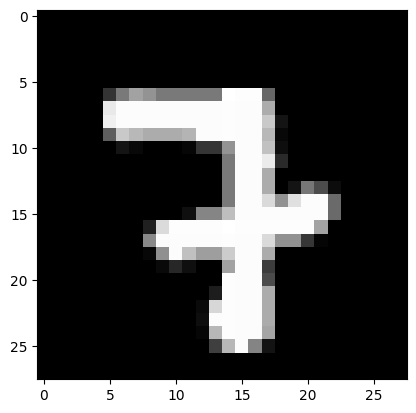

In [22]:
test() # do one to visualise 


In [23]:
testMany() # do many for accuracy calculation 

accuracy: 93.71666666666667%
